In [2]:
from astropy.utils.data import conf
from astropy import units as u
from astropy.time import Time, TimeDelta
from astropy.coordinates import solar_system_ephemeris
from matplotlib import pyplot as plt

from poliastro.bodies import Sun, Earth, Moon
from poliastro.ephem import Ephem
from poliastro.frames import Planes
from poliastro.plotting import StaticOrbitPlotter
from poliastro.plotting.misc import plot_solar_system
from poliastro.twobody import Orbit
from poliastro.util import norm, time_range


In [8]:
matplotlib.rcParams['font.sans-serif'] = ['Source Han Sans TW', 'sans-serif']
print(conf.dataurl)
print(conf.remote_timeout)
conf.remote_timeout = 10000
plt.style.use('seaborn-whitegrid')
solar_system_ephemeris.set("jpl")
EPOCH = Time("2021-08-21 00:01:00", scale="tdb")
C_FLORENCE = "#000"
C_MOON = "#999"
# Earth.plot(EPOCH)

NameError: name 'matplotlib' is not defined

In [4]:
florence_osc = Orbit.from_sbdb("2016 AJ193")
print(florence_osc)
print(florence_osc.epoch.iso)

1 x 6 AU x 22.6 deg (HeliocentricEclipticIAU76) orbit around Sun (☉) at epoch 2459396.5008007423 (TDB)
2021-07-01 00:01:09.184


In [5]:
epochs = time_range(EPOCH - TimeDelta(3 * 30 * u.day), end=EPOCH + TimeDelta(3 * 30 * u.day))
florence = Ephem.from_horizons("2016 AJ193", epochs, plane=Planes.EARTH_ECLIPTIC)
print(florence)
print(florence.plane)

Ephemerides at 50 epochs from 2021-05-23 00:01:00.000 (TDB) to 2021-11-19 00:01:00.000 (TDB)
Planes.EARTH_ECLIPTIC


In [6]:
earth = Ephem.from_body(Earth, epochs, plane=Planes.EARTH_ECLIPTIC)
print(earth)

Ephemerides at 50 epochs from 2021-05-23 00:01:00.000 (TDB) to 2021-11-19 00:01:00.000 (TDB)


3705643.1480869967 km
Ephemerides at 50 epochs from 2021-08-16 00:01:00.000 (TDB) to 2021-08-26 00:01:00.000 (TDB)


/usr/local/lib/python3.9/dist-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 9791 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/dist-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 9793 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/dist-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 9791 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.9/dist-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 9793 missing from current font.
  font.set_text(s, 0, flags=flags)


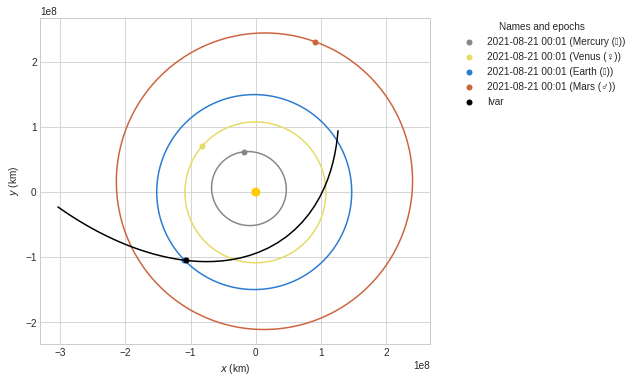

In [7]:
min_distance = norm(florence.rv(EPOCH)[0] - earth.rv(EPOCH)[0]) - Earth.R
print(min_distance.to(u.km))

abs((min_distance - 7060160 * u.km) / (7060160 * u.km)).decompose()

frame = plot_solar_system(outer=False, epoch=EPOCH)
frame.plot_ephem(florence, EPOCH, label="Ivar", color=C_FLORENCE)
# frame.plot(florence_osc, label="Ivar 1627", color=C_FLORENCE)

epochs = time_range(EPOCH - TimeDelta(5 * u.day), end=EPOCH + TimeDelta(5 * u.day))
ivar = Ephem.from_horizons("Ivar", epochs, attractor=Earth)
print(ivar)

plt.show()